<a href="https://colab.research.google.com/github/MLandML/MLandML/blob/main/TF_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
mnist= tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [5]:
model.compile(optimizer = "adam",
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2958 - accuracy: 0.9139 - val_loss: 0.1333 - val_accuracy: 0.9609
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1430 - accuracy: 0.9570 - val_loss: 0.1080 - val_accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1082 - accuracy: 0.9672 - val_loss: 0.0854 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9730 - val_loss: 0.0793 - val_accuracy: 0.9773
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0752 - accuracy: 0.9763 - val_loss: 0.0789 - val_accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0676 - accuracy: 0.9792 - val_loss: 0.0690 - val_accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0595 - accuracy: 0.9805 - val_loss: 0.0678 - val_accuracy:

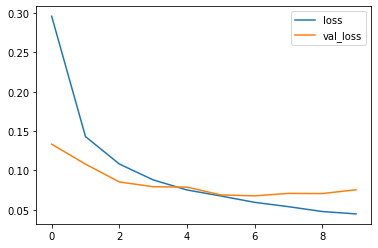

In [7]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],Label='loss')
plt.plot(r.history['val_loss'],Label='val_loss')
plt.legend()

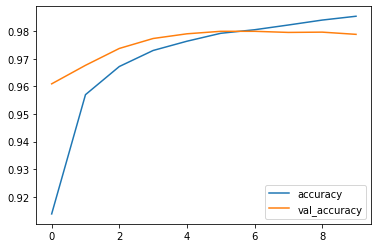

In [8]:
plt.plot(r.history['accuracy'],Label='accuracy')
plt.plot(r.history['val_accuracy'],Label='val_accuracy')
plt.legend()

In [34]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9788


[0.07550377398729324, 0.9787999987602234]

In [36]:
p_test= model.predict(x_test).argmax(axis=1)
p_test

array([7, 2, 1, ..., 4, 5, 6])

Text(0.5, 1.0, 'True Label:5 Predicted Label:0')

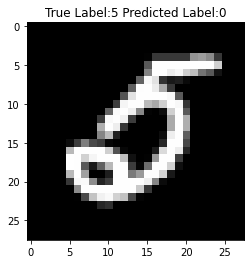

In [40]:
import numpy as np
misclassfied_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassfied_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True Label:%s Predicted Label:%s'%(y_test[i],p_test[i]))